# WeatherPy
----

### Analysis
* As one would expect, the temperature increases significantly the closer we get to the equator.
* There is no strong relationship between latitude and wind speed, but there are a few cities with very high wind speeds in the upper northern hemisphere.
* There does appear to be a relationship between latitude and humidity. There are no cities with humidity below 50% within 5 degrees of latitude to the equator. Humidity also increases the further away from the equator we are.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
weather_df = pd.DataFrame({
    "City": cities,
})
weather_df.head()

,City
0,san felipe
1,tuktoyaktuk
2,mataura
3,fairbanks
4,khatanga


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
windSpeed = []

In [6]:
for city in cities:
    print(f"Retrieving weather results for {city}.")
    response = requests.get(query_url + city).json()

    try:
        cloudiness.append(response['clouds']['all'])
    except (KeyError, IndexError):
        cloudiness.append('NaN')  
    
    try:
        country.append(response['sys']['country'])
    except (KeyError, IndexError):
        country.append('NaN')    
        
    try:
        date.append(response['dt'])
    except (KeyError, IndexError):
        date.append('NaN')
        
    try:
        humidity.append(response['main']['humidity'])
    except (KeyError, IndexError):
        humidity.append('NaN')
        
    try:
        lat.append(response['coord']['lat'])
    except (KeyError, IndexError):
        lat.append('NaN')
        
    try:
        lng.append(response['coord']['lon'])
    except (KeyError, IndexError):
        lng.append('NaN')
    
    try:
        temp.append(response['main']['temp_max'])
    except (KeyError, IndexError):
        temp.append('NaN')            
    
    try:
        windSpeed.append(response['wind']['speed'])
    except (KeyError, IndexError):
        windSpeed.append('NaN')              
        
    print("------------")

Retrieving weather results for san felipe.
------------
Retrieving weather results for tuktoyaktuk.
------------
Retrieving weather results for mataura.
------------
Retrieving weather results for fairbanks.
------------
Retrieving weather results for khatanga.
------------
Retrieving weather results for busselton.
------------
Retrieving weather results for new norfolk.
------------
Retrieving weather results for karaul.
------------
Retrieving weather results for faanui.
------------
Retrieving weather results for umm kaddadah.
------------
Retrieving weather results for coihaique.
------------
Retrieving weather results for ngunguru.
------------
Retrieving weather results for saint-philippe.
------------
Retrieving weather results for chuy.
------------
Retrieving weather results for hermanus.
------------
Retrieving weather results for fortuna.
------------
Retrieving weather results for faya.
------------
Retrieving weather results for kavieng.
------------
Retrieving weather res

------------
Retrieving weather results for yomitan.
------------
Retrieving weather results for raudeberg.
------------
Retrieving weather results for djibo.
------------
Retrieving weather results for vao.
------------
Retrieving weather results for solhan.
------------
Retrieving weather results for dickinson.
------------
Retrieving weather results for vardo.
------------
Retrieving weather results for ayorou.
------------
Retrieving weather results for zhangye.
------------
Retrieving weather results for severo-kurilsk.
------------
Retrieving weather results for pine bluff.
------------
Retrieving weather results for cabo san lucas.
------------
Retrieving weather results for ketchikan.
------------
Retrieving weather results for tecoanapa.
------------
Retrieving weather results for namibe.
------------
Retrieving weather results for arona.
------------
Retrieving weather results for tautira.
------------
Retrieving weather results for altamira.
------------
Retrieving weather r

------------
Retrieving weather results for rabo de peixe.
------------
Retrieving weather results for pacific grove.
------------
Retrieving weather results for santa cruz.
------------
Retrieving weather results for chakia.
------------
Retrieving weather results for olafsvik.
------------
Retrieving weather results for neuquen.
------------
Retrieving weather results for biankouma.
------------
Retrieving weather results for olinda.
------------
Retrieving weather results for teocaltiche.
------------
Retrieving weather results for luderitz.
------------
Retrieving weather results for mecca.
------------
Retrieving weather results for lixourion.
------------
Retrieving weather results for pevek.
------------
Retrieving weather results for itarema.
------------
Retrieving weather results for kruisfontein.
------------
Retrieving weather results for kondol.
------------
Retrieving weather results for manaure.
------------
Retrieving weather results for gorontalo.
------------
Retrievi

------------
Retrieving weather results for villa maria.
------------
Retrieving weather results for rungata.
------------
Retrieving weather results for xining.
------------
Retrieving weather results for steamboat springs.
------------
Retrieving weather results for indramayu.
------------
Retrieving weather results for borujan.
------------
Retrieving weather results for san policarpo.
------------
Retrieving weather results for bontoc.
------------
Retrieving weather results for sidi ali.
------------
Retrieving weather results for zalari.
------------
Retrieving weather results for sao felix do xingu.
------------
Retrieving weather results for najran.
------------
Retrieving weather results for unguia.
------------
Retrieving weather results for jacmel.
------------
Retrieving weather results for cerkezkoy.
------------
Retrieving weather results for monrovia.
------------
Retrieving weather results for kathmandu.
------------
Retrieving weather results for marsh harbour.
-------

------------
Retrieving weather results for tezu.
------------
Retrieving weather results for half moon bay.
------------
Retrieving weather results for muncar.
------------
Retrieving weather results for gardan diwal.
------------
Retrieving weather results for chernyshevskiy.
------------
Retrieving weather results for platanos.
------------
Retrieving weather results for paradwip.
------------
Retrieving weather results for jasper.
------------
Retrieving weather results for roebourne.
------------
Retrieving weather results for vostok.
------------
Retrieving weather results for el balyana.
------------
Retrieving weather results for smithers.
------------
Retrieving weather results for bijie.
------------
Retrieving weather results for ixtapa.
------------
Retrieving weather results for grindavik.
------------
Retrieving weather results for mendoza.
------------
Retrieving weather results for barabai.
------------
Retrieving weather results for dehloran.
------------
Retrieving we

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df["Cloudiness"] = cloudiness
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Humidity"] = humidity
weather_df["Lat"] = lat
weather_df["Lng"] = lng
weather_df["Max Temp"] = temp
weather_df["Wind Speed"] = windSpeed

In [8]:
cleaned_weather_df = weather_df.loc[weather_df["Max Temp"] != "NaN"]
cleaned_weather_df = cleaned_weather_df.reset_index(drop=True)

cleaned_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san felipe,0,CL,1554432503,73,-32.75,-70.73,62.01,2.15
1,tuktoyaktuk,20,CA,1554429600,84,69.44,-133.03,-2.21,3.36
2,mataura,80,NZ,1554432006,57,-46.19,168.86,54,1.99
3,fairbanks,1,US,1554432432,49,64.84,-147.72,35.01,16.11
4,khatanga,64,RU,1554432526,90,71.98,102.47,16.88,15.01


In [9]:
cleaned_weather_df.to_csv("output/weather.csv", index=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

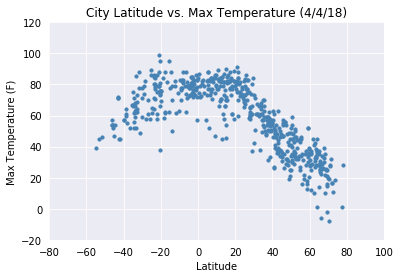

In [14]:
fig, ax = plt.subplots()

ax.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Max Temp"], marker="o", 
           c="steelblue", cmap="Blues", s=10)

ax.set_title('City Latitude vs. Max Temperature (4/4/18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    axis='x',
    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

ax.set_facecolor('#EBECF3')

ax.grid(color='snow', linewidth=1)
ax.set_axisbelow(True)

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.savefig("images/lat_v_temp.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

#### Latitude vs. Humidity Plot

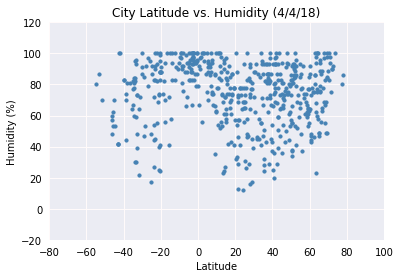

In [11]:
fig, ax = plt.subplots()

ax.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Humidity"], marker="o", 
           c="steelblue", cmap="Blues", s=10)

ax.set_title('City Latitude vs. Humidity (4/4/18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    axis='x',
    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

ax.set_facecolor('#EBECF3')

ax.grid(color='snow', linewidth=1)
ax.set_axisbelow(True)

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.savefig("images/lat_v_humid.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

#### Latitude vs. Cloudiness Plot

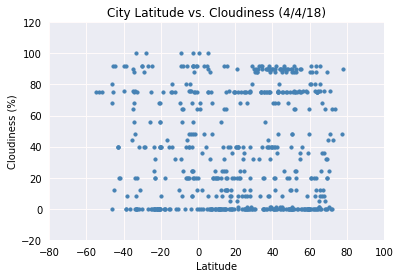

In [12]:
fig, ax = plt.subplots()

ax.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Cloudiness"], marker="o", 
           c="steelblue", cmap="Blues", s=10)

ax.set_title('City Latitude vs. Cloudiness (4/4/18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    axis='x',
    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

ax.set_facecolor('#EBECF3')

ax.grid(color='snow', linewidth=1)
ax.set_axisbelow(True)

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.savefig("images/lat_v_cloud.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

#### Latitude vs. Wind Speed Plot

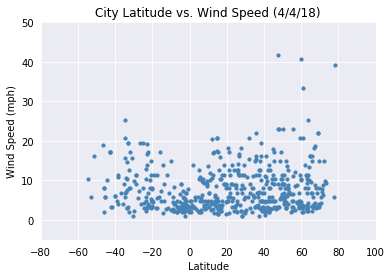

In [13]:
fig, ax = plt.subplots()

ax.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Wind Speed"], marker="o", 
           c="steelblue", cmap="Blues", s=10)

ax.set_title('City Latitude vs. Wind Speed (4/4/18)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    axis='x',
    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

ax.set_facecolor('#EBECF3')

ax.grid(color='snow', linewidth=1)
ax.set_axisbelow(True)

plt.xlim(-80, 100)
plt.ylim(-5, 50)

plt.savefig("images/lat_v_wind.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()